<h1 align = "center">Data Preprocessing</h1>

## Import libraries

In [1]:
import os
import numpy as np

#Visualization
import matplotlib.pyplot as plt

#Warnings
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

#path
import sys
sys.path.append("..")

#Custom 
import config
from src.features import eeg
from src.features import img
from src.visualization import visualize as vis

# EEG preprocessing

In [2]:
df = eeg.read_data("../data/raw/EEG/train1.csv")
# dopracowac read_data bo odczyt bedzie z emotiva

In [3]:
df.head()

,AF3,F7,F3,FC5,T7,P7,O1,O2,P8,T8,FC6,F4,F8,AF4
0,4148.717773,4151.281738,4145.127930,4172.820312,4190.256348,4168.205078,4168.717773,4176.922852,4175.384277,4179.487305,4151.281738,4149.230469,4152.307617,4157.436035
1,4142.051270,4145.127930,4137.948730,4161.025391,4182.563965,4164.615234,4166.153809,4175.897461,4170.256348,4175.897461,4155.384277,4144.615234,4153.846191,4152.307617
2,4154.358887,4150.256348,4149.230469,4168.205078,4180.000000,4169.230469,4174.871582,4170.256348,4167.179199,4173.333008,4162.051270,4151.281738,4156.922852,4153.333008
3,4163.076660,4157.948730,4155.384277,4182.563965,4188.717773,4169.743652,4171.281738,4161.025391,4160.512695,4162.051270,4157.948730,4151.281738,4155.384277,4162.051270
4,4162.051270,4158.461426,4158.974121,4187.179199,4196.410156,4168.717773,4166.153809,4158.974121,4154.871582,4160.000000,4156.410156,4154.358887,4153.333008,4164.102539


In [4]:
eeg.check_missing_values(df).T

Missing values INFO :

Your selected dataframe has 14 columns and 9088 Rows.



,AF3,AF4,F3,F4,F7,F8,FC5,FC6,O1,P7,T7,T8,O2,P8
Total,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Percent,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Dtype,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64


In [5]:
df = eeg.drop_missing(df)

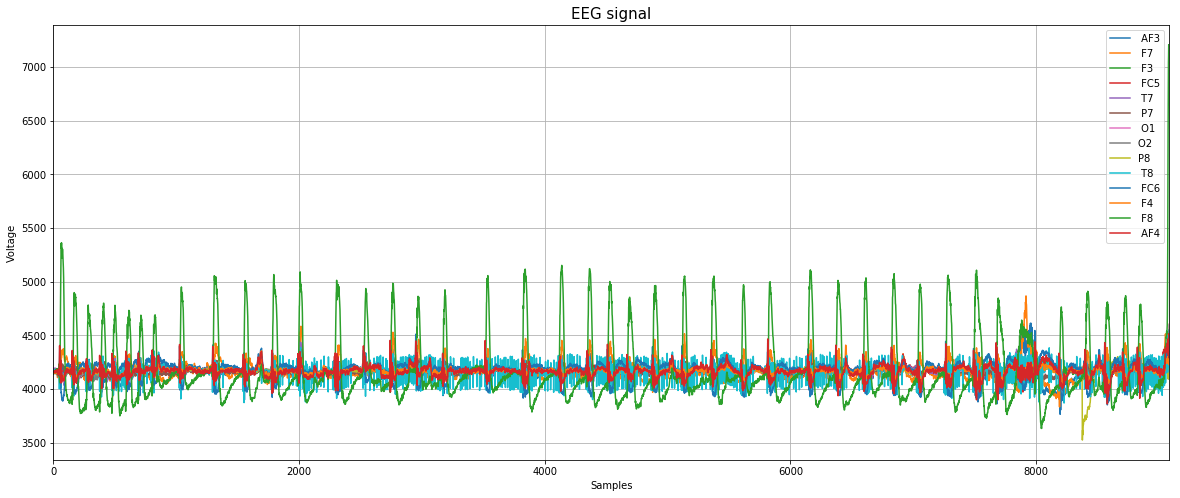

In [6]:
df.plot(figsize=(20,8))
plt.grid()
_ = plt.title("EEG signal",size=15)
_ = plt.xlabel("Samples")
_ = plt.ylabel("Voltage")

### EEG Normalization

In [7]:
# Normalize data
df, scaler = eeg.normalize(df)

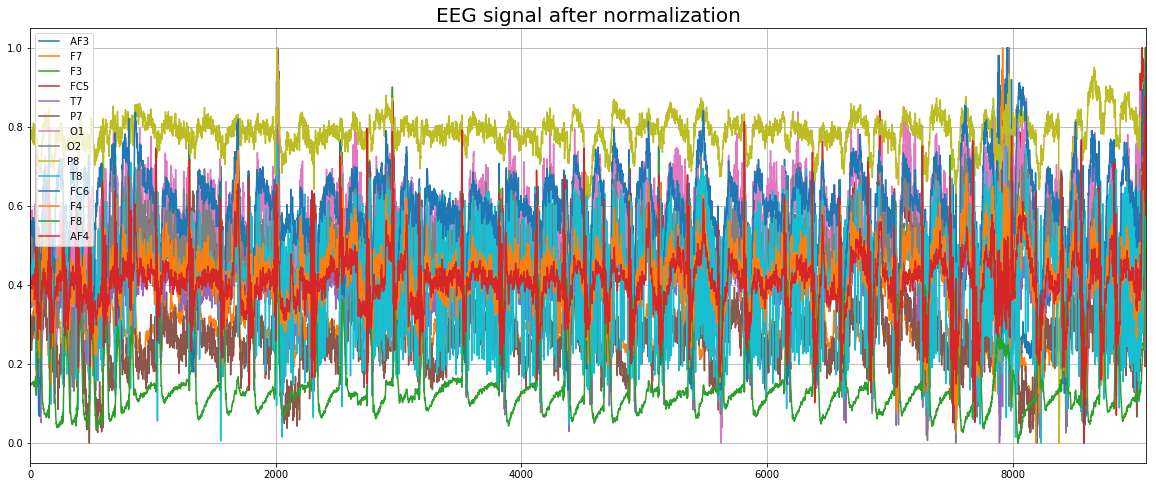

In [8]:
df.plot(figsize=(20,8))
plt.title("EEG signal after normalization",size = 20)
plt.grid()

### Save/minmaxScaler 

In [9]:
scaler_filename = "../models/data_scaler.save"
eeg.save_preprocessing_object(scaler,scaler_filename)

Object was saved into path : ../models/data_scaler.save


### Read Scaler

In [10]:
scaler  = eeg.load_preprocessing_object(scaler_filename)

## Resize data

In [11]:
df = eeg.resize(df,260,260)

# Image preprocessing

In [12]:
# Const
x=260
y=260

In [13]:
from keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

Using TensorFlow backend.


In [14]:
image = img.normalize(x_train[0])

In [15]:
image = img.resize(image,x,y)

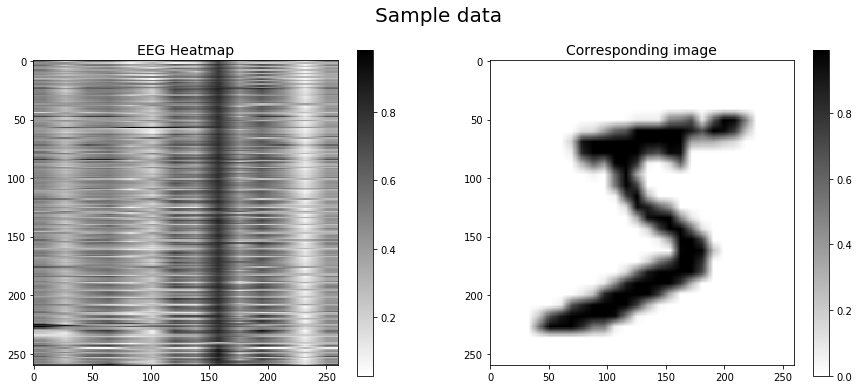

In [16]:
vis.plot_sample(df,image)

# Train-test split 

# Save to preprocessed

In [17]:
np.save(os.path.join(config.PREPROCESSED_EEG_DIR,"eeg"),df)

In [18]:
np.save(os.path.join(config.PREPROCESSED_IMG_DIR,"img"),image)

In [19]:
end

NameError: name 'end' is not defined

# Check signal differences

In [ ]:
def df_eeg_difference(df1,df2):
    df_diff = pd.DataFrame({"Sum diff" : np.sum(df1-df2),"Mean diff" : np.mean(df1-df2)}).T
    return df_diff

In [ ]:
df_eeg_difference(df_train,df_test).T